**Import Libraries & Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ecommerce_data.csv")
print(df)

        Customer ID     Purchase Date Product Category  Product Price  \
0             46251     9/8/2020 9:38      Electronics             12   
1             46251    3/5/2022 12:56             Home            468   
2             46251   5/23/2022 18:18             Home            288   
3             46251  11/12/2020 13:13         Clothing            196   
4             13593  11/27/2020 17:55             Home            449   
...             ...               ...              ...            ...   
249995        33308   8/10/2023 13:39         Clothing            279   
249996        48835   11/23/2021 1:30             Home             27   
249997        21019    7/2/2020 14:04             Home             17   
249998        49234   12/30/2020 2:02            Books            398   
249999        16971   3/13/2021 16:28      Electronics            425   

        Quantity  Total Purchase Amount Payment Method  Customer Age  Returns  \
0              3                    740   

**Overview**

In [2]:
print("Shape:", df.shape)
print("\nInformation\n", df.info())
print("\nTypes:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nHead:\n", df.head(10))
print("\nDescriptive Statistics:\n", df.describe())

Shape: (250000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB

Informatio

**Handle missing values**

In [3]:
df["Returns"] = df["Returns"].fillna(df["Returns"].median()) 

**Fix data types**

In [4]:
# Convert dates
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])

# Ensure numeric fields
df["Product Price"] = pd.to_numeric(df["Product Price"], errors = "coerce")
df["Total Purchase Amount"] = pd.to_numeric(df["Total Purchase Amount"], errors = "coerce")

**Exploratory Data Analysis (EDA)**

**A-General Statistics**

In [5]:
print("Unique Customers:", df["Customer ID"].nunique())
print("Unique Products:", df["Product Category"].nunique())
print("Total Revenue:", df["Total Purchase Amount"].sum())

Unique Customers: 49673
Unique Products: 4
Total Revenue: 681342683


**B-Sales Trends Over Time**

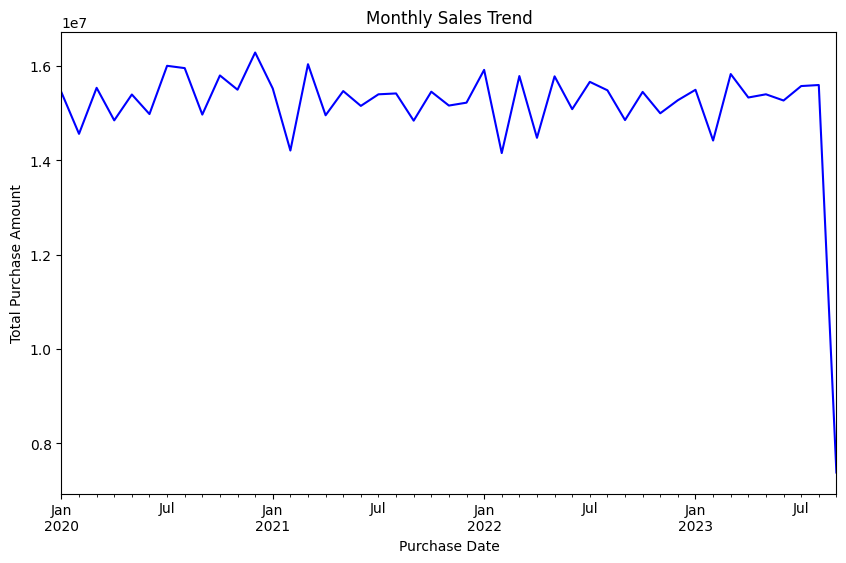

In [6]:
df.groupby(df["Purchase Date"].dt.to_period("M"))["Total Purchase Amount"].sum().plot(kind = "line", figsize = (10,6), color = "blue")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Purchase Amount")
plt.show()

**C-Customer Demographics**

**Customer Distribution by Gender**

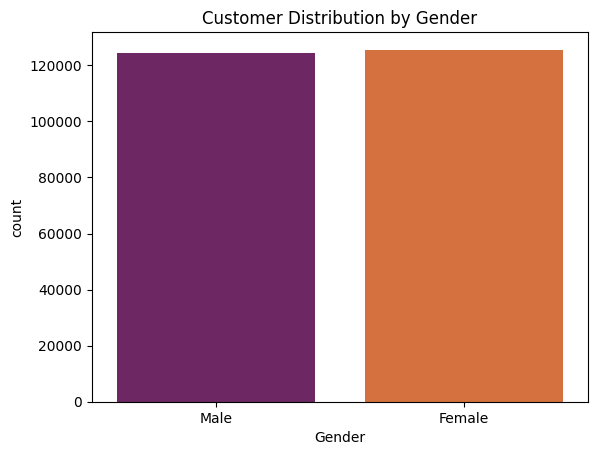

In [7]:
sns.countplot(data = df, x = "Gender", hue = "Gender", palette = "inferno")
plt.title("Customer Distribution by Gender")
plt.show()

**Customer Age Distribution**

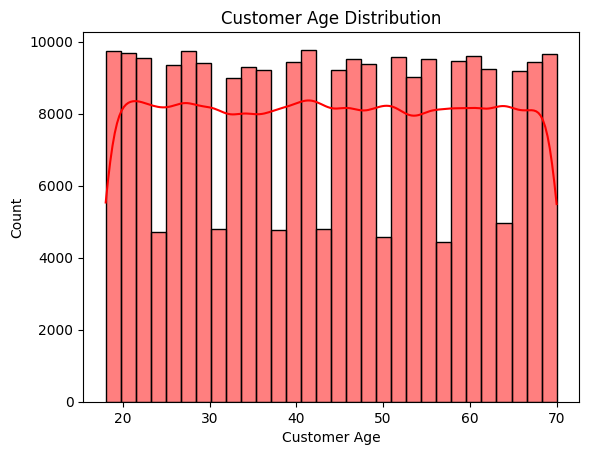

In [8]:
sns.histplot(df["Customer Age"], bins = 30, kde = True, color = "red")
plt.title("Customer Age Distribution")
plt.show()

**D-Product Performance**

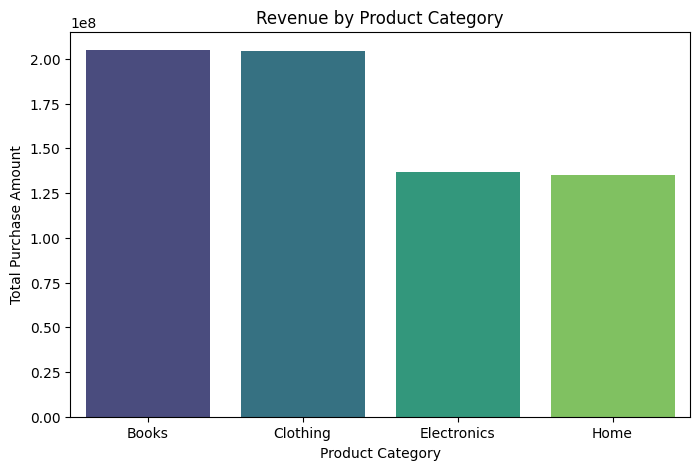

In [9]:
top_products = df.groupby("Product Category")["Total Purchase Amount"].sum().sort_values(ascending=False).reset_index()

n_bars = top_products.shape[0]
colors = sns.color_palette("viridis", n_bars)
plt.figure(figsize=(8,5))

sns.barplot(data = top_products, x = "Product Category", y = "Total Purchase Amount", hue = "Product Category", palette = colors, dodge = False)

plt.title("Revenue by Product Category")
plt.legend([],[], frameon=False)
plt.show()

**Highest Spending Age Group**

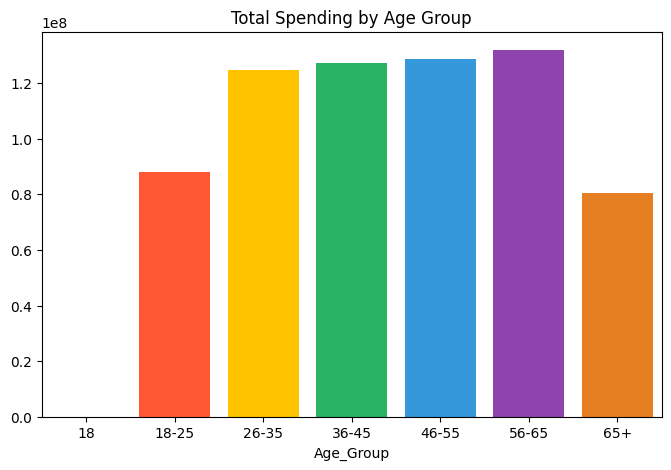

In [10]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ["18", "18-25", "26-35", "36-45", "46-55", "56-65", "65+"]
df["Age_Group"] = pd.cut(df["Customer Age"], bins = bins, labels = labels, right = False)

age_spend = df.groupby("Age_Group", observed=True)["Total Purchase Amount"].sum().sort_values(ascending = False)

plt.figure(figsize = (8,5))
ax = sns.barplot(x = age_spend.index, y = age_spend.values)

custom_colors = ["#FF5733", "#FFC300", "#28B463", "#3498DB", "#8E44AD", "#E67E22", "#2ECC71"]

for bar, color in zip(ax.patches, custom_colors):bar.set_facecolor(color)
    
plt.title("Total Spending by Age Group")
plt.show()

**Customer Churn by Age Group**

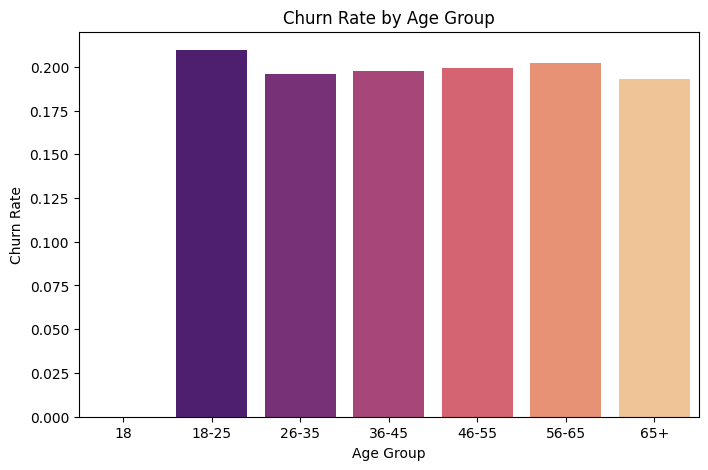

In [11]:
churn_by_age = df.groupby("Age_Group", observed=False)["Churn"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x = churn_by_age.index, y = churn_by_age.values, hue = churn_by_age.index, palette = "magma", legend = False)    

plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate")
plt.show()

**Payment Method Analysis**

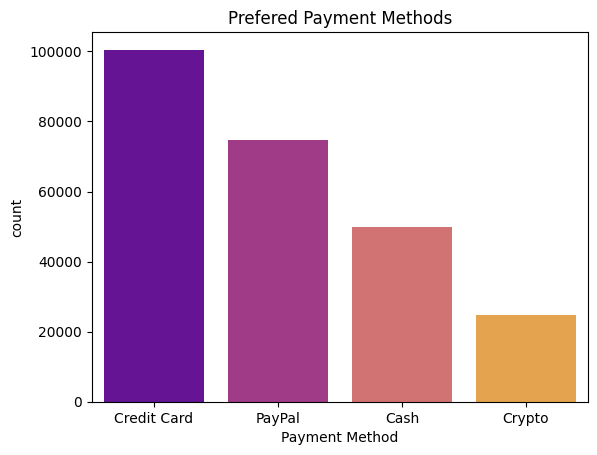

In [12]:
sns.countplot(data = df, x = "Payment Method", palette = "plasma", hue = "Payment Method")
plt.title("Prefered Payment Methods")
plt.show()

**Customer Behavior Analysis**

**A-Customer Segmentation (RFM Analysis)**

**RFM = Recency, Frequency, Monetary**

In [13]:
import datetime as dt

snapshot_date = df["Purchase Date"].max() + pd.Timedelta(days = 1)

rfm = df.groupby("Customer ID").agg({"Purchase Date": lambda x: (snapshot_date - x.max()).days, "Customer ID": "count", "Total Purchase Amount": "sum"})

rfm.rename(columns = {"Purchase Date": "Recency", "Customer ID": "Frequency", "Total Purchase Amount": "Monetary"}, inplace = True)
print(rfm.head())

             Recency  Frequency  Monetary
Customer ID                              
1                 58          1      3491
2                299          3      7988
3                 89          8     22587
4                127          4      8715
5                171          8     12524


**B-Churn Analysis**

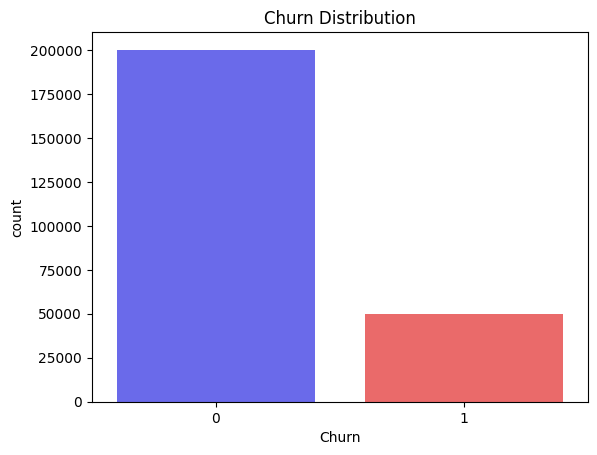

Churn
0    2724.815996
1    2727.596684
Name: Total Purchase Amount, dtype: float64


In [14]:
sns.countplot(data = df, x = "Churn", hue = "Churn", palette = "seismic", legend = False)
plt.title("Churn Distribution")
plt.show()

churn_analysis = df.groupby("Churn")["Total Purchase Amount"].mean()
print(churn_analysis)

**Returns Analysis**

Returns
0.0    406676297
1.0    274666386
Name: Total Purchase Amount, dtype: int64


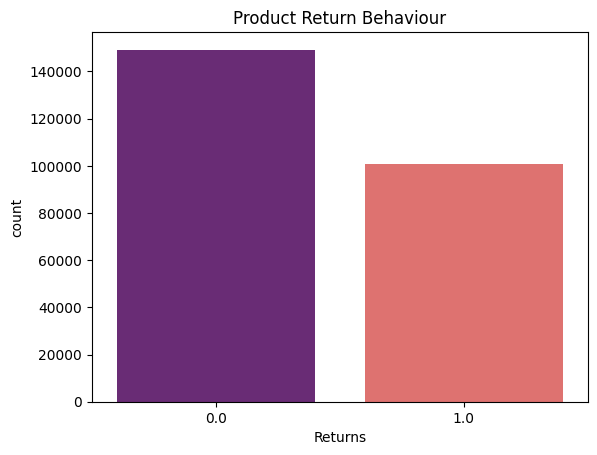

In [15]:
returns = df.groupby("Returns")["Total Purchase Amount"].sum()
print(returns)

sns.countplot(data = df, x = "Returns", hue = "Returns", palette = "magma", legend = False)
plt.title("Product Return Behaviour")
plt.show()

**Return Rate and Its Impact on Churn**

Return Rate (%):
Returns
0.0    59.6924
1.0    40.3076
Name: proportion, dtype: float64


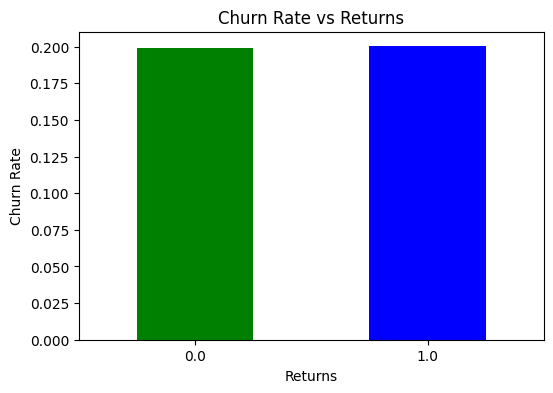

In [16]:
return_rate = df['Returns'].value_counts(normalize=True) * 100
print("Return Rate (%):")
print(return_rate)

return_churn = df.groupby('Returns')['Churn'].mean()

return_churn.plot(kind='bar', figsize=(6,4), color=["green", "blue"])
plt.title("Churn Rate vs Returns")
plt.ylabel("Churn Rate")
plt.xticks(rotation=0)
plt.show()